초기 데이터 구조:
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
1980-03-17   0.0  4.05  3.85   3.85   3.213167   15000
1980-03-18   0.0  4.00  3.80   3.80   3.171437   10200
1980-03-19   0.0  4.05  3.85   3.85   3.213167   33500
1980-03-20   0.0  4.00  3.80   3.80   3.171437    8700
1980-03-21   0.0  3.95  3.75   3.75   3.129709   12700

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB
None

기술 통계:
               Open          High           Low         Close     Adj Close  \
count 

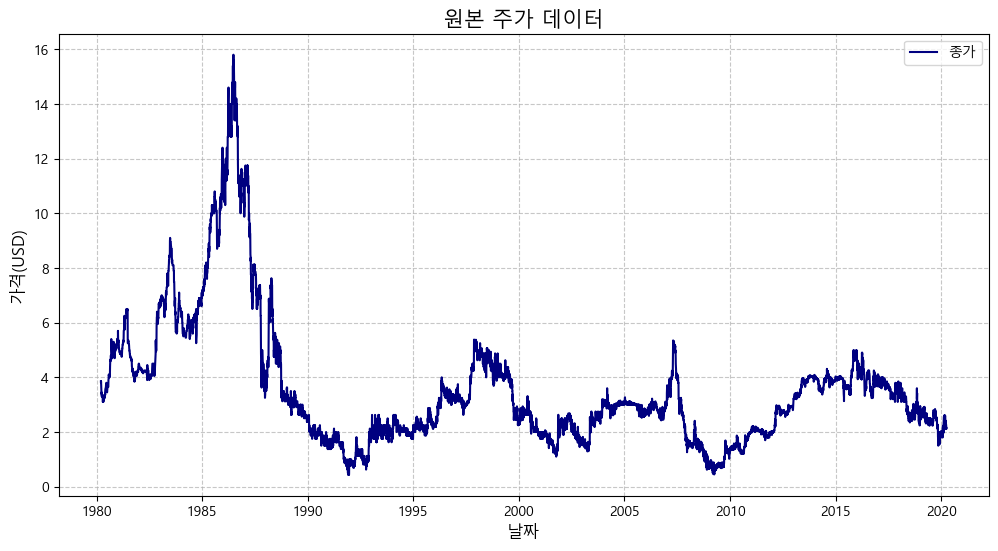

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.dates as mdates

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 로드 및 초기 분석
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/AAME.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

print("="*50)
print("초기 데이터 구조:")
print(df.head())
print("\n데이터 정보:")
print(df.info())
print("\n기술 통계:")
print(df.describe())

# 2. 원본 데이터 시각화
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='종가', color='navy')
plt.title('원본 주가 데이터', fontsize=15)
plt.xlabel('날짜', fontsize=12)
plt.ylabel('가격(USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 3. 데이터 전처리
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_step=60):
    X, y, dates = [], [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i+time_step, 0])
        dates.append(df.index[i+time_step])
    return np.array(X), np.array(y), np.array(dates)

time_step = 60
X, y, dates = create_dataset(scaled_data, time_step)

# 4. 데이터 분할
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
test_dates = dates[train_size:]

# 차원 변환
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


LSTM 학습 시작...
Epoch 1/50


C:\Users\USER\anaconda3\envs\steam_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0136 - val_loss: 2.5685e-04
Epoch 2/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0013 - val_loss: 1.6997e-04
Epoch 3/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0012 - val_loss: 1.7267e-04
Epoch 4/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.9260e-04 - val_loss: 1.8504e-04
Epoch 5/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 9.3758e-04 - val_loss: 1.5621e-04
Epoch 6/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 9.6013e-04 - val_loss: 1.4509e-04
Epoch 7/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 8.4316e-04 - val_loss: 1.1451e-04
Epoch 8/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.2109e-04 - val_loss: 1.7637e-04
Epoch 9/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 8.9070e-04 - val_loss: 1.1944e-04
Epoch 10/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 7.7850e-04 - val_loss: 1.1128e-04
Epoch 11/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.9794e-04

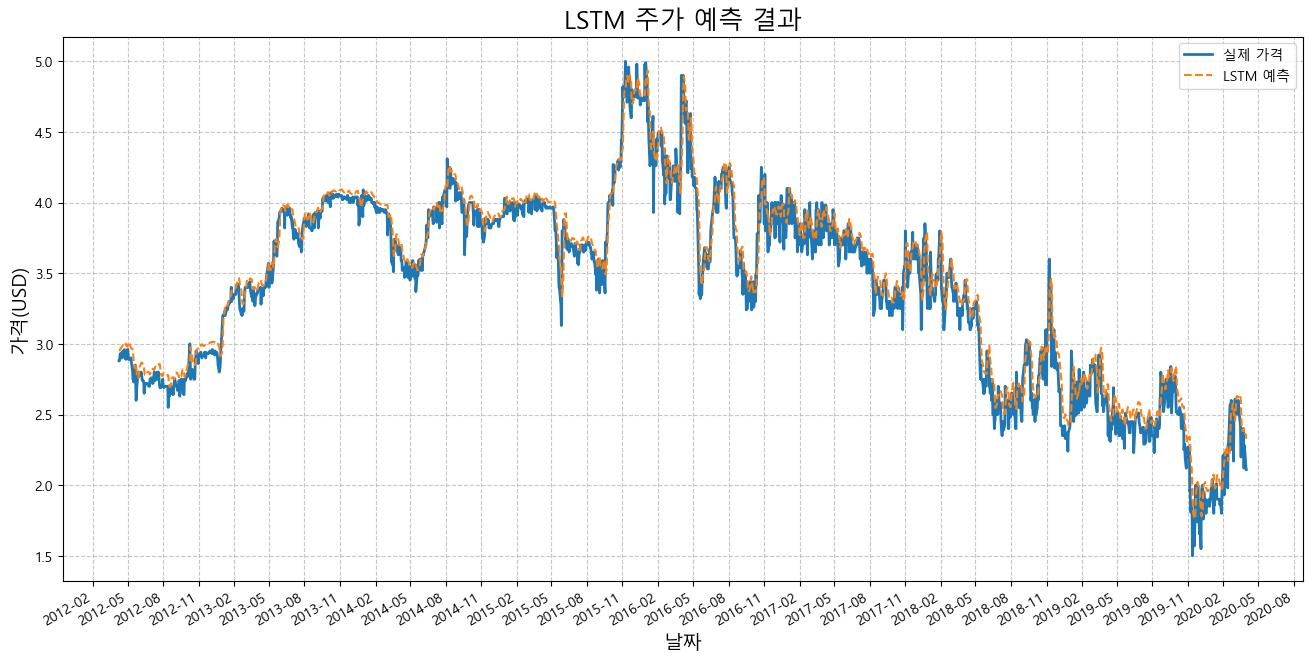

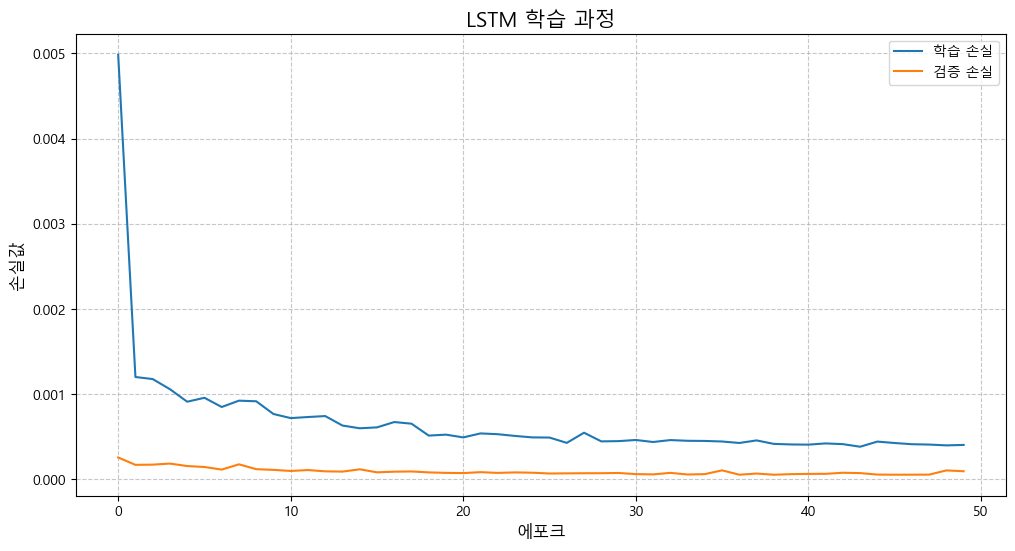

In [2]:
# 5. LSTM 모델 구성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(0.001), loss='mse')

# 6. 학습 진행
print("\nLSTM 학습 시작...")
history = model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=64,
                   validation_split=0.2,
                   verbose=1)

# 7. 예측 및 시각화
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(16,8))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.plot(test_dates, y_actual, label='실제 가격', linewidth=2, color='#1f77b4')
plt.plot(test_dates, predictions, label='LSTM 예측', linestyle='--', color='#ff7f0e')
plt.title('LSTM 주가 예측 결과', fontsize=18)
plt.xlabel('날짜', fontsize=14)
plt.ylabel('가격(USD)', fontsize=14)
plt.gcf().autofmt_xdate()  # 날짜 기울기
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 학습 과정 시각화
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='학습 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('LSTM 학습 과정', fontsize=15)
plt.xlabel('에포크', fontsize=12)
plt.ylabel('손실값', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()